--- Bernstein-Vazirani Circuit Scaling Analysis ---
n    Depth     Gate Count     Operations
------------------------------------------------------------
2    6         10             OrderedDict({'h': 5, 'cx': 2, 'measure': 2, 'x': 1})
3    7         14             OrderedDict({'h': 7, 'cx': 3, 'measure': 3, 'x': 1})
4    8         18             OrderedDict({'h': 9, 'cx': 4, 'measure': 4, 'x': 1})
5    9         22             OrderedDict({'h': 11, 'cx': 5, 'measure': 5, 'x': 1})
6    10        26             OrderedDict({'h': 13, 'cx': 6, 'measure': 6, 'x': 1})
7    11        30             OrderedDict({'h': 15, 'cx': 7, 'measure': 7, 'x': 1})
8    12        34             OrderedDict({'h': 17, 'cx': 8, 'measure': 8, 'x': 1})
9    13        38             OrderedDict({'h': 19, 'cx': 9, 'measure': 9, 'x': 1})
10   14        42             OrderedDict({'h': 21, 'cx': 10, 'measure': 10, 'x': 1})
11   15        46             OrderedDict({'h': 23, 'cx': 11, 'measure': 11, 'x': 1})
12   

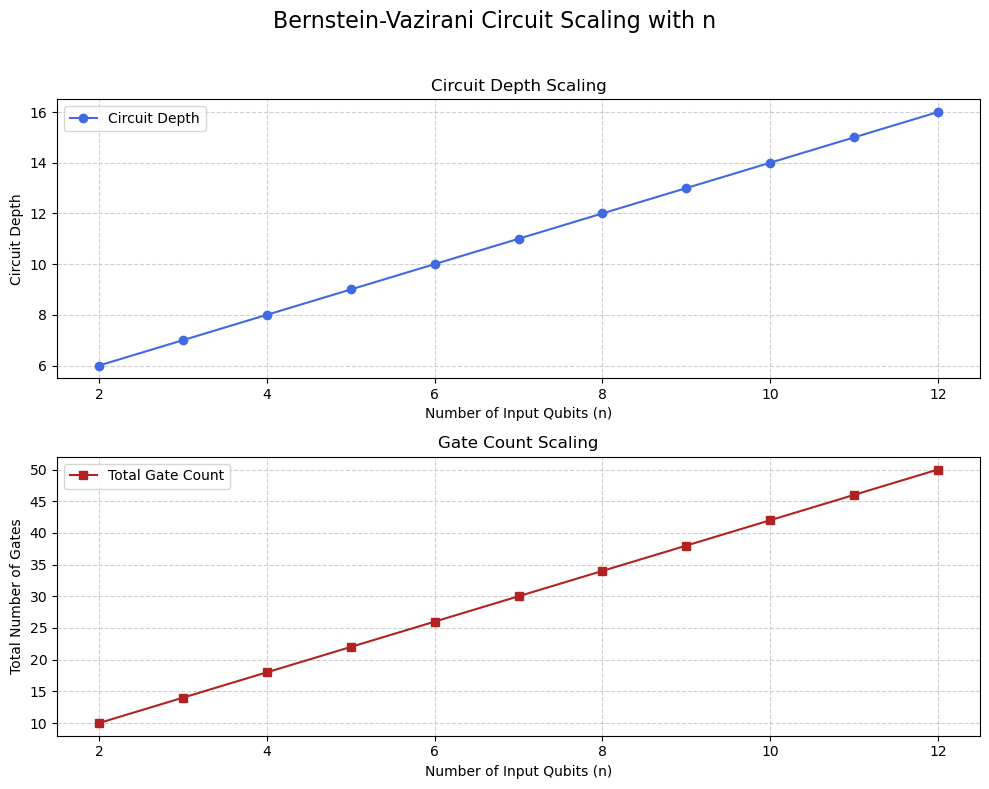

In [5]:
# Import Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import *
import matplotlib.pyplot as plt

# Function to implement the Bernstein-Vazirani circuit
def bernstein_vazirani(s: str):
    n = len(s)  # Number of qubits

    # Step 1: Initialize registers
    # We need n qubits for the input register and one ancillary qubit for the oracle.
    # We also need n classical bits to store the measurement results.
    # The qubits are automatically initialized to the state |0⟩.
    
    qc = QuantumCircuit(n + 1, n)

    # Step 2 To create the phase oracle, we need the ancillary qubit in the state |−⟩.
    # We achieve this by applying an X gate (to make it |1⟩) followed by a Hadamard gate.
    qc.x(n)
    qc.h(n)
    #qc.barrier() # Add a barrier for visual clarity
    # Apply Hadamard gates to all input qubits
    # This puts the input register into a superposition of all possible states.
    qc.h(range(n))
    
    #qc.barrier() # Add a barrier for visual clarity
    
   # Step 3: Apply the phase oracle U_f
    # The oracle flips the phase of the states |x⟩ based on the secret string 's'.
    # It applies a CNOT for each '1' in the secret_string.
    # The i-th qubit is the control and the ancillary qubit is the target.
    # We iterate through the secret string in reverse because Qiskit orders qubits from right to left (q0, q1, ...).
    for i, bit in enumerate(reversed(s)):
        if bit == '1':
            qc.cx(i, n) # Apply CNOT from data qubit i to the ancilla

    #qc.barrier() # for visual separation

    # Step 4: Apply Hadamard gates again to the input qubits
    # This interferes the states to isolate the secret string 's'.
    qc.h(range(n))

    # Step 5: Measure the first n qubits
    # Measure the first n qubits
    qc.measure(range(n), range(n))

    return qc

def analyze_scaling():
    """
    Main function to run the scaling analysis. It loops through different
    values of n, creates the BV circuit, records metrics, and plots the results.
    """
    # Define the range of n values to test
    n_values = range(2, 13) # Test for n from 2 to 12 qubits

    depths = []
    gate_counts = []

    print("--- Bernstein-Vazirani Circuit Scaling Analysis ---")
    print(f"{'n':<5}{'Depth':<10}{'Gate Count':<15}{'Operations'}")
    print("-" * 60)

    for n in n_values:
        # For a consistent scaling analysis (worst-case), we assume the
        # secret string 's' is all ones. This maximizes CNOTs in the oracle.
        secret_string = '1' * n
        
        # Create the circuit
        bv_circuit = bernstein_vazirani(secret_string)

        # Calculate metrics
        depth = bv_circuit.depth()
        ops = bv_circuit.count_ops()
        gate_count = sum(ops.values())

        # Store results
        depths.append(depth)
        gate_counts.append(gate_count)

        # Print the results for this n
        print(f"{n:<5}{depth:<10}{gate_count:<15}{ops}")

    # --- Plotting the Results ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle('Bernstein-Vazirani Circuit Scaling with n', fontsize=16)

    # Plot 1: Circuit Depth vs. n
    ax1.plot(n_values, depths, 'o-', label='Circuit Depth', color='royalblue')
    ax1.set_xlabel('Number of Input Qubits (n)')
    ax1.set_ylabel('Circuit Depth')
    ax1.set_title('Circuit Depth Scaling')
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.legend()

    # Plot 2: Gate Count vs. n
    ax2.plot(n_values, gate_counts, 's-', label='Total Gate Count', color='firebrick')
    ax2.set_xlabel('Number of Input Qubits (n)')
    ax2.set_ylabel('Total Number of Gates')
    ax2.set_title('Gate Count Scaling')
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



analyze_scaling()

In [34]:
plt.show()